# Setting up notebook

In [0]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.colors
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, log_loss

In [2]:
from tqdm import tqdm_notebook
import seaborn as sns
import time
from IPython.display import HTML
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_blobs

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
import torch

In [4]:
torch.manual_seed(0)

In [0]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("",["red","yellow","green"])

# Generating dataset

In [0]:
"""
make_blobs used to generate sample data, for rapid prototyping. 
"""

data, labels = make_blobs(n_samples = 1000, 
                          centers = 4, 
                          n_features = 2,
                          random_state = 0)

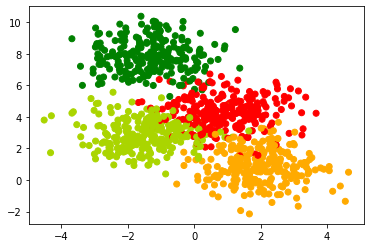

In [7]:
"""
The first argument takes in the data along x axis and the second along y axis. 
The c refers to the color for the point which is marked by its generated label.
The cmap employed here is the one initialised in the setup segment.
"""

plt.scatter(data[:,0],data[:,1], c = labels, cmap = my_cmap)
plt.show()

# Train, test split

In [0]:
"""
stratify argument allows for almost same representation of a class in both X_train and X_val
"""

X_train, X_val, Y_train, Y_val = train_test_split(data, labels, stratify = labels, random_state = 0)

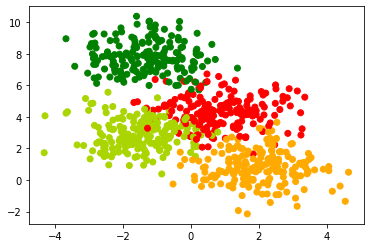

In [9]:
plt.scatter(X_train[:,0], X_train[:,1], c = Y_train, cmap=my_cmap)
plt.show()

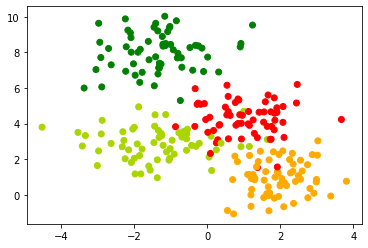

In [10]:
plt.scatter(X_val[:,0], X_val[:,1], c = Y_val, cmap=my_cmap)
plt.show()

# Pytorch Segment

## Defining model using torch tensors and autograd

In [0]:
"""
Hint of functional programming being used here, mapping the torch.tensor constructor to the tuple of arguments.
"""

X_train, X_val , Y_train, Y_val = map(torch.tensor,(X_train, X_val, Y_train, Y_val))

In [12]:
a = torch.rand(2,4)
print(a)
print(a.exp())
print(a.exp().shape)
print(a.exp().sum(0))
print(a.exp().sum(-1)) #follows reverse indexation
print(a.exp().sum(-1).shape)
print(a.exp().sum(-1).unsqueeze(-1)) #Returns a new tensor with a dimension of size one inserted at the specified position.
print(a.exp().sum(-1).unsqueeze(-1).shape)

"""
The unsqueeze part is done because the size of tensors part of the operation should match at non-singleton dimension. Which is (2,4) and (2,1). 
Hence 2 should match for both the invoved tensors for the operation to know which dim is to be operated on.
"""

tensor([[0.4963, 0.7682, 0.0885, 0.1320],
        [0.3074, 0.6341, 0.4901, 0.8964]])
tensor([[1.6426, 2.1559, 1.0925, 1.1411],
        [1.3599, 1.8853, 1.6325, 2.4509]])
torch.Size([2, 4])
tensor([3.0025, 4.0412, 2.7250, 3.5920])
tensor([6.0321, 7.3285])
torch.Size([2])
tensor([[6.0321],
        [7.3285]])
torch.Size([2, 1])


'\nThe unsqueeze part is done because the size of tensors part of the operation should match at non-singleton dimension. Which is (2,4) and (2,1). \nHence 2 should match for both the invoved tensors for the operation to know which dim is to be operated on.\n'

In [0]:
def model(x):
  a1 = torch.matmul(x, weights1)+bias1
  h1 = a1.sigmoid()
  a2 = torch.matmul(h1, weights2)+bias2
  h2 = a2.exp()/a2.exp().sum(-1).unsqueeze(-1)
  return h2

In [14]:
s = torch.tensor([[0,1,2],[3,4,5]])

"""
Returns a list of array accesses corresponding to the list of indices in the argument lists/ranges 
"""
print(s[range(2), [0,2]])

x = torch.rand(5,4,3)
print(x)
print(x[range(2),range(2),[0,2]])
#list(range(2))

tensor([0, 5])
tensor([[[0.4556, 0.6323, 0.3489],
         [0.4017, 0.0223, 0.1689],
         [0.2939, 0.5185, 0.6977],
         [0.8000, 0.1610, 0.2823]],

        [[0.6816, 0.9152, 0.3971],
         [0.8742, 0.4194, 0.5529],
         [0.9527, 0.0362, 0.1852],
         [0.3734, 0.3051, 0.9320]],

        [[0.1759, 0.2698, 0.1507],
         [0.0317, 0.2081, 0.9298],
         [0.7231, 0.7423, 0.5263],
         [0.2437, 0.5846, 0.0332]],

        [[0.1387, 0.2422, 0.8155],
         [0.7932, 0.2783, 0.4820],
         [0.8198, 0.9971, 0.6984],
         [0.5675, 0.8352, 0.2056]],

        [[0.5932, 0.1123, 0.1535],
         [0.2417, 0.7262, 0.7011],
         [0.2038, 0.6511, 0.7745],
         [0.4369, 0.5191, 0.6159]]])
tensor([0.4556, 0.5529])


In [15]:
"""
y : labels
y_hat : probability distributions for the labels
"""
y_hat = torch.tensor([[0.1,0.2,0.3,0.4],[0.8,0.1,0.05,0.05]])
y = torch.tensor([2,0])
print(y_hat[range(y_hat.shape[0]),y])
print(-y_hat[range(y_hat.shape[0]),y].log().mean().item()) #cross-entropy

tensor([0.3000, 0.8000])
0.7135581970214844


In [16]:
print(torch.argmax(y_hat,1)) # The second argument here corresponds to dim, to find max element along
print(torch.argmax(y_hat,1)==y) # Can be used to calculate accuracy

tensor([3, 0])
tensor([False,  True])


In [0]:
def loss_fn(y_hat, y):
  return -y_hat[range(y_hat.shape[0]),y].log().mean()

In [18]:
loss_fn(y_hat, y)

tensor(0.7136)

In [0]:
def accuracy(y_hat,y):
  return (torch.argmax(y_hat,1)==y).float().mean()

In [20]:
accuracy(y_hat,y)

tensor(0.5000)

## Defining weights used in the model

In [21]:
torch.manual_seed(0)

In [0]:
weights1 = torch.randn(2,2)/math.sqrt(2) #Xavier initialisation
weights1.requires_grad = True
bias1 = torch.zeros(2,requires_grad=True)
weights2 = torch.randn(2,4)/math.sqrt(2) #Xavier initialisation
weights2.requires_grad = True
bias2 = torch.zeros(4,requires_grad=True)

## Statistics

In [0]:
def stats(loss_arr, acc_arr):
  plt.plot(loss_arr,"r-")
  plt.plot(acc_arr,"b-")
  print("Loss before training:", loss_arr[0].item())
  print("Loss after training:", loss_arr[-1].item())
  print("Accuracy before training", acc_arr[0].item())
  print("Accuracy after training",acc_arr[-1].item())

## Model training

In [0]:
learning_rate = 0.2
epochs = 1000

In [0]:
X_train = X_train.float()
Y_train = Y_train.long()

In [0]:
loss_arr = []
acc_arr = []

Loss before training: 1.5456440448760986
Loss after training: 0.6061185598373413
Accuracy before training 0.25066667795181274
Accuracy after training 0.7226666808128357


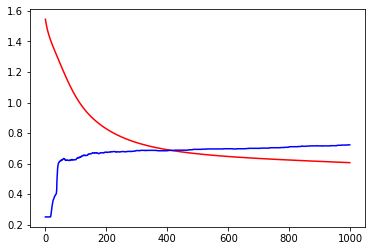

In [27]:
for epoch in range(epochs):
  y_hat = model(X_train)
  loss = loss_fn(y_hat, Y_train)
  
  loss.backward()

  loss_arr.append(loss)
  acc_arr.append(accuracy(y_hat,Y_train))

  #Computations not added to the computation graph
  with torch.no_grad():
    weights1 -= weights1.grad * learning_rate
    bias1 -= bias1.grad * learning_rate
    weights2 -= weights2.grad * learning_rate
    bias2 -= bias2.grad * learning_rate

    #Resetting the calculated gradients for next epoch
    weights1.grad.zero_()
    bias1.grad.zero_()
    weights2.grad.zero_()
    bias2.grad.zero_()

stats(loss_arr, acc_arr)

## Using torch.nn.functional

allows the use of std. functions required in Deep Learning like cross entropy, all else remains the same.

In [0]:
import torch.nn.functional as f

Loss before training: 1.5456440448760986
Loss after training: 1.0417625904083252
Accuracy before training 0.25066667795181274
Accuracy after training 0.6933333277702332


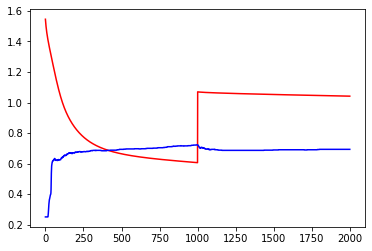

In [29]:
for epoch in range(epochs):
  y_hat = model(X_train)
  loss = f.cross_entropy(y_hat, Y_train)
  
  loss.backward()

  loss_arr.append(loss)
  acc_arr.append(accuracy(y_hat,Y_train))

  #Computations not added to the computation graph
  with torch.no_grad():
    weights1 -= weights1.grad * learning_rate
    bias1 -= bias1.grad * learning_rate
    weights2 -= weights2.grad * learning_rate
    bias2 -= bias2.grad * learning_rate

    #Resetting the calculated gradients for next epoch
    weights1.grad.zero_()
    bias1.grad.zero_()
    weights2.grad.zero_()
    bias2.grad.zero_()

stats(loss_arr,acc_arr)

## Using nn.parameter

The defined data is assumed to have the requires_grad field set since they are the parameters of the model 

In [0]:
import torch.nn as nn

Using a class to define the neural network, which was previously done by defining weights separately and the forward function separately. This class structure encapsulates the model parameters and the forward propogation that is achieved using these parameters.

In [0]:
class FirstNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    torch.manual_seed(0)
    self.weights1 = nn.Parameter(torch.randn(2,2)/math.sqrt(2))
    self.bias1 = nn.Parameter(torch.zeros(2))
    self.weights2 = nn.Parameter(torch.randn(2,4)/math.sqrt(2))
    self.bias2 = nn.Parameter(torch.zeros(4))

  def forward(self,x):
    a1 = torch.matmul(x,self.weights1)+self.bias1
    h1 = a1.sigmoid()
    a2 = torch.matmul(h1,self.weights2)+self.bias2
    h2 = a2.exp()/a2.exp().sum(-1).unsqueeze(-1)
    return h2

Loss before training: 1.5456440448760986
Loss after training: 1.0417625904083252
Accuracy before training 0.25066667795181274
Accuracy after training 0.6933333277702332


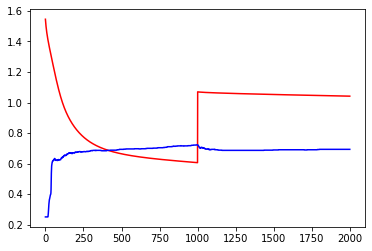

In [32]:
def fit(epochs=1000,learning_rate=1):
  """
  Training/Tuning the model
  """
  loss_arr = []
  acc_arr = []

  for epoch in range(epochs):
    y_hat = fn(X_train) #Here fn refers to the globally scoped instance of the FirstNetwork Class. Calls the forward function of the class
    loss = f.cross_entropy(y_hat, Y_train)

    loss.backward()

    loss_arr.append(loss)
    acc_arr.append(accuracy(y_hat,Y_train))

    #fn.parameters can be used to refer to and index the parameters of the model
    with torch.no_grad():
      for param in fn.parameters():
        param -= param.grad * learning_rate
      fn.zero_grad() #Calls for reset of grads for the entire model instance

fn = FirstNetwork()
fit()
stats(loss_arr,acc_arr)

## Using nn.linear and nn.optim

nn.linear removes the need to separately write weights and biases. <br>
nn.optim abstracts away the need to write the update rule for the parameters

In [0]:
class FirstNetwork_v1(nn.Module):

  def __init__(self):
    super().__init__()
    torch.manual_seed(0)
    self.lin1 = nn.Linear(2,2)
    self.lin2 = nn.Linear(2,4)

  def forward(self,x):
    a1 = self.lin1(x)
    h1 = a1.sigmoid()
    a2 = self.lin2(h1)
    h2 = a2.exp()/a2.exp().sum(-1).unsqueeze(-1)
    return h2

In [0]:
from torch import optim

Loss before training: 1.5456440448760986
Loss after training: 1.0417625904083252
Accuracy before training 0.25066667795181274
Accuracy after training 0.6933333277702332


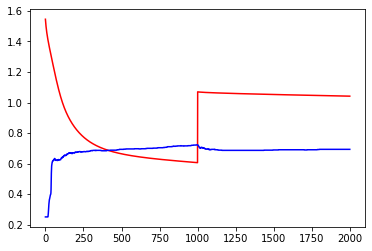

In [35]:
def fit_v1(epochs=1000,learning_rate=1):
  loss_arr = []
  acc_arr = []

  #Takes as arguments the parameters to update, and the learning rate. These are the exact things we were using to update our weights manually
  opt = optim.SGD(fn.parameters(),lr=learning_rate)

  for epoch in range(epochs):
    y_hat = fn(X_train)
    loss = f.cross_entropy(y_hat, Y_train)
    loss_arr.append(loss)
    acc_arr.append(accuracy(y_hat,Y_train))

    loss.backward()

    #The weight update step
    opt.step()
    opt.zero_grad()

fn = FirstNetwork_v1()
fit_v1
stats(loss_arr, acc_arr)

## Using nn.Sequential

allows us to define a sequence through which our data goes through which also includes the activations. This makes the forward function very basic and reduces work

In [0]:
class FirstNetwork_v2(nn.Module):

  def __init__(self):
    super().__init__()
    torch.manual_seed(0)
    self.net = nn.Sequential(
        nn.Linear(2,2),
        nn.Sigmoid(),
        nn.Linear(2,4),
        nn.Softmax()
    )
  
  def forward(self,x):
    return self.net(x)

In [0]:
def fit_v2(X_train,Y_train,fn,opt,loss_fn,epochs=1000):
  loss_arr = []
  acc_arr = []

  for epoch in range(epochs):
    y_hat = fn(X_train)
    loss = loss_fn(y_hat, Y_train)
    loss_arr.append(loss)
    acc_arr.append(accuracy(y_hat,Y_train))

    loss.backward()

    #The parameter update step
    opt.step()
    opt.zero_grad()
  
  stats(loss_arr,acc_arr)

Loss before training: 1.395160436630249
Loss after training: 1.1441882848739624
Accuracy before training 0.164000004529953
Accuracy after training 0.6520000100135803


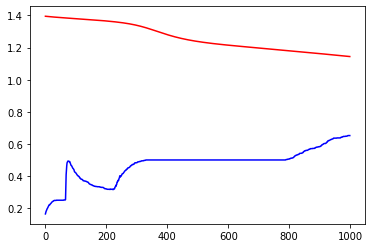

In [38]:
#parameters and grad are accessed using getters

fn = FirstNetwork_v2()
opt = optim.SGD(fn.parameters(),lr=0.2)
loss_fn = f.cross_entropy
fit_v2(X_train,Y_train,fn,opt,loss_fn)


## Migrating to CUDA

just need to cast all data to the required device and then call the same functions.

Loss before training: 1.3951594829559326
Loss after training: 1.1441876888275146
Accuracy before training 0.164000004529953
Accuracy after training 0.6520000100135803
0.846282958984375


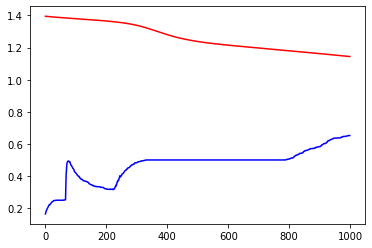

In [42]:
device = torch.device("cuda")

X_train = X_train.to(device)
Y_train = Y_train.to(device)
fn = FirstNetwork_v2()
fn.to(device)
opt = optim.SGD(fn.parameters(),lr=0.2)
tic = time.time()
fit_v2(X_train,Y_train,fn,opt,loss_fn,1000)
toc = time.time()
print(toc-tic)

Loss before training: 1.395160436630249
Loss after training: 1.1441882848739624
Accuracy before training 0.164000004529953
Accuracy after training 0.6520000100135803
1.062234878540039


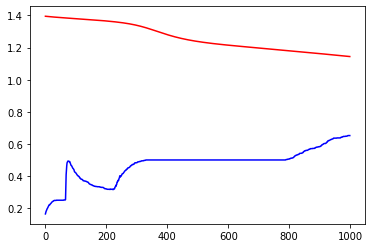

In [43]:
device = torch.device("cpu")

X_train = X_train.to(device)
Y_train = Y_train.to(device)
fn = FirstNetwork_v2()
fn.to(device)
opt = optim.SGD(fn.parameters(),lr=0.2)
tic = time.time()
fit_v2(X_train,Y_train,fn,opt,loss_fn,1000)
toc = time.time()
print(toc-tic)

In [0]:
class FirstNetwork_v3(nn.Module):

  def __init__(self):
    super().__init__()
    torch.manual_seed(0)
    self.net = nn.Sequential(
        nn.Linear(2,1024),
        nn.Sigmoid(),
        nn.Linear(1024,4),
        nn.Softmax()
    )
  
  def forward(self,x):
    return self.net(x)

Loss before training: 1.3988277912139893
Loss after training: 0.8259584903717041
Accuracy before training 0.25200000405311584
Accuracy after training 0.9240000247955322
5.289446115493774


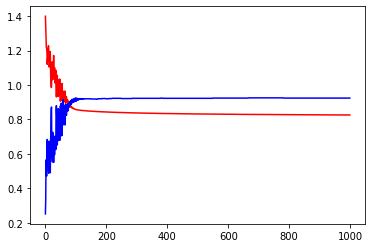

In [60]:
device = torch.device("cpu")

X_train = X_train.to(device)
Y_train = Y_train.to(device)
fn = FirstNetwork_v3()
fn.to(device)
opt = optim.SGD(fn.parameters(),lr=0.2)
tic = time.time()
fit_v2(X_train,Y_train,fn,opt,loss_fn,1000)
toc = time.time()
print(toc-tic)

Loss before training: 1.3988269567489624
Loss after training: 0.8259567022323608
Accuracy before training 0.25200000405311584
Accuracy after training 0.9239999651908875
0.9826219081878662


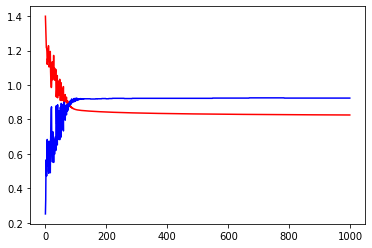

In [61]:
device = torch.device("cuda")

X_train = X_train.to(device)
Y_train = Y_train.to(device)
fn = FirstNetwork_v3()
fn.to(device)
opt = optim.SGD(fn.parameters(),lr=0.2)
loss_fn = f.cross_entropy
tic = time.time()
fit_v2(X_train,Y_train,fn,opt,loss_fn,1000)
toc = time.time()
print(toc-tic)

In [0]:
class FirstNetwork_v4(nn.Module):

  def __init__(self):
    super().__init__()
    torch.manual_seed(0)
    self.net = nn.Sequential(
        nn.Linear(2,1024*4),
        nn.Sigmoid(),
        nn.Linear(1024*4,4),
        nn.Softmax()
    )
  
  def forward(self,x):
    return self.net(x)

Loss before training: 1.3890224695205688
Loss after training: 1.0507694482803345
Accuracy before training 0.25066667795181274
Accuracy after training 0.6880000233650208
21.174417972564697


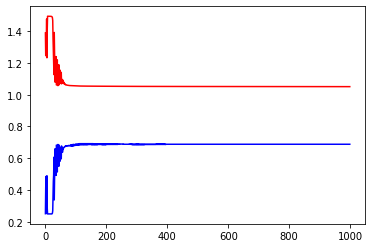

In [65]:
device = torch.device("cpu")

X_train = X_train.to(device)
Y_train = Y_train.to(device)
fn = FirstNetwork_v4()
fn.to(device)
opt = optim.SGD(fn.parameters(),lr=0.2)
tic = time.time()
fit_v2(X_train,Y_train,fn,opt,loss_fn,1000)
toc = time.time()
print(toc-tic)

Loss before training: 1.3890228271484375
Loss after training: 1.0508136749267578
Accuracy before training 0.25066667795181274
Accuracy after training 0.687999963760376
1.4602224826812744


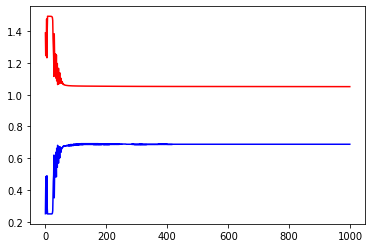

In [66]:
device = torch.device("cuda")

X_train = X_train.to(device)
Y_train = Y_train.to(device)
fn = FirstNetwork_v4()
fn.to(device)
opt = optim.SGD(fn.parameters(),lr=0.2)
loss_fn = f.cross_entropy
tic = time.time()
fit_v2(X_train,Y_train,fn,opt,loss_fn,1000)
toc = time.time()
print(toc-tic)

In [0]:
def init_weights(m):
  if type(m) == nn.Linear:
    nn.init.xavier_uniform_(m.weight)
    nn.init.constant_(m.bias, 0)

In [0]:
class FirstNetwork_v5(nn.Module):

  def __init__(self):
    super().__init__()
    torch.manual_seed(0)
    self.net = nn.Sequential(
        nn.Linear(2,1024),
        nn.Sigmoid(),
        nn.Linear(1024,256),
        nn.Sigmoid(),
        nn.Linear(256,4),
        nn.Softmax()
    )
    self.net.apply(init_weights)

  def forward(self,x):
    return self.net(x)

In [0]:
def pipeline(X_train,Y_train,network,device,opt_fn,lr=0.2,epochs=1000):

  X_train = X_train.to(device)
  Y_train = Y_train.to(device)
  fn = network()
  fn.to(device)
  opt = opt_fn(fn.parameters(),lr)
  loss_fn = f.cross_entropy
  tic = time.time()
  fit_v2(X_train,Y_train,fn,opt,loss_fn,epochs)
  toc = time.time()
  print(toc-tic)

Loss before training: 1.395702600479126
Loss after training: 0.8319613337516785
Accuracy before training 0.24933333694934845
Accuracy after training 0.9253333210945129
1.0606932640075684


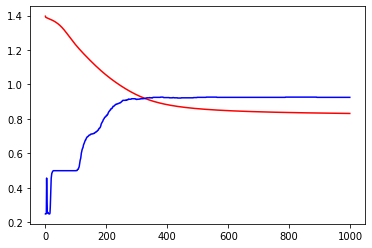

In [108]:
device = torch.device("cuda")
pipeline(X_train,Y_train, FirstNetwork_v5,device,optim.SGD)

Loss before training: 1.395702600479126
Loss after training: 0.9810361266136169
Accuracy before training 0.24933333694934845
Accuracy after training 0.746666669845581
1.6382880210876465


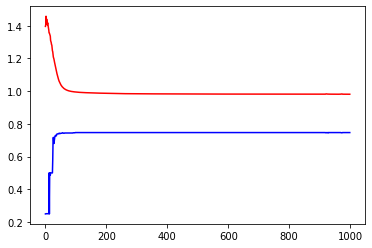

In [109]:
device = torch.device("cuda")
pipeline(X_train,Y_train, FirstNetwork_v5,device,optim.Adam,0.01)

Loss before training: 1.395702600479126
Loss after training: 0.8328996300697327
Accuracy before training 0.24933333694934845
Accuracy after training 0.9253333210945129
1.2334511280059814


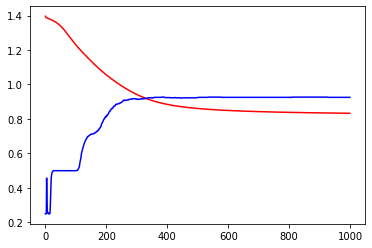

In [110]:
device = torch.device("cuda")
pipeline(X_train,Y_train, FirstNetwork_v5,device,optim.ASGD)

Loss before training: 1.395702600479126
Loss after training: 1.4930013418197632
Accuracy before training 0.24933333694934845
Accuracy after training 0.25066667795181274
1.5703799724578857


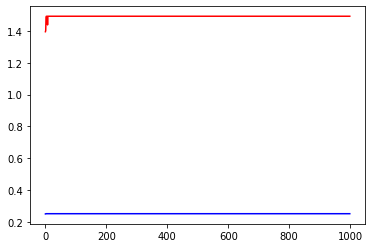

In [111]:
device = torch.device("cuda")
pipeline(X_train,Y_train, FirstNetwork_v5,device,optim.RMSprop,0.01)

Loss before training: 1.395702600479126
Loss after training: 0.831985354423523
Accuracy before training 0.24933333694934845
Accuracy after training 0.9253333210945129
1.7190303802490234


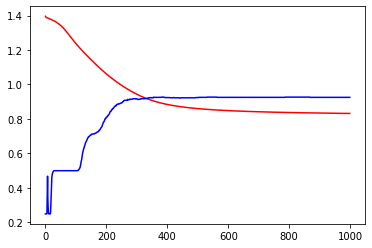

In [112]:
device = torch.device("cuda")
pipeline(X_train,Y_train, FirstNetwork_v5,device,optim.Adadelta)

Loss before training: 1.395702600479126
Loss after training: 0.8146204948425293
Accuracy before training 0.24933333694934845
Accuracy after training 0.9333333373069763
1.3315811157226562


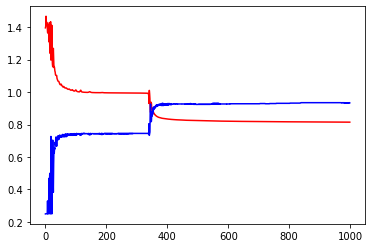

In [113]:
device = torch.device("cuda")
pipeline(X_train,Y_train, FirstNetwork_v5,device,optim.Adagrad,0.01)

Loss before training: 1.395702600479126
Loss after training: 0.9829137325286865
Accuracy before training 0.24933333694934845
Accuracy after training 0.746666669845581
1.9522857666015625


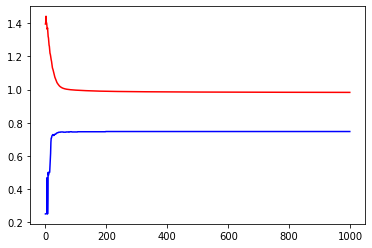

In [114]:
device = torch.device("cuda")
pipeline(X_train,Y_train, FirstNetwork_v5,device,optim.Adamax,0.01)

In [126]:
for param in fn.parameters():
  print(param.shape)

torch.Size([1024, 2])
torch.Size([1024])
torch.Size([256, 1024])
torch.Size([256])
torch.Size([4, 256])
torch.Size([4])
